# Analisis y descriptivos de los datos ODK
Santiago Jaramillo 
Juan Camilo Rivera 


Los datos utilizados en este analisis son de la herramienta ODK utilizadas en las zonas arroceras ubicadas en el norte del Peru. Las zonas están ubicadas Selva y Costa. Las zonas en Selva son Tarapoto y Jaen, y en Costa son Lambayeque y Piura. 

In [1]:
%load_ext rpy2.ipython

In [2]:
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Rendimiento
## Costa

1.8709043771586635

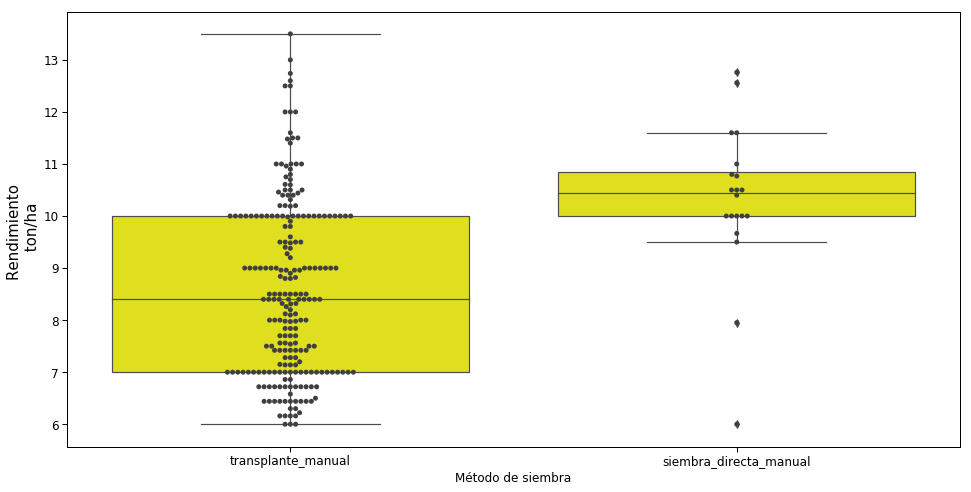

In [2]:
#Lectura de los datos
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pylab as pl
import matplotlib.dates as mdates
import datetime
import matplotlib.pyplot as plt
import collections
import statistics 
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
from math import sqrt
from numpy.random import seed
from numpy.random import randn

%matplotlib inline  


#Control de los colores y fuentes 
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }


os.chdir('D:\\OneDrive - CGIAR\\PROYECTOS\\Peru\\DATA')
os.getcwd()

import chardet    
rawdata = open('BASEDATOS_RENDIMIENTO.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
#print(charenc)

rendimiento = pd.read_csv("BASEDATOS_RENDIMIENTO.csv", encoding = charenc)
distanciaZurcosPlanta_Rendi = rendimiento[['Rendimiento', 'Entrezurcos_EntrePlantas','TecnicaSiembra']]
distanciaZurcosPlanta_Rendi=distanciaZurcosPlanta_Rendi[distanciaZurcosPlanta_Rendi.Entrezurcos_EntrePlantas != 'NA_NA']

sns.set_context("paper", rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":15})   


rend_costa = rendimiento.loc[(rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo'), ['Rendimiento', 'TecnicaSiembra']]




plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="TecnicaSiembra", y="Rendimiento", data=rend_costa, color = "yellow")
ax = sns.swarmplot(x="TecnicaSiembra", y="Rendimiento", data=rend_costa, color=".25")
ax.set_ylabel('Rendimiento \n ton/ha')
ax.set_xlabel("Método de siembra",fontsize=12)
ax.tick_params(labelsize=12)
ax.figure.savefig("GRAFICAS/Rendimiento_Costa.png")

rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual'), "Rendimiento"].describe()

statistics.variance(rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual'), "Rendimiento"])

In [5]:
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p


data1 = rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual'), "Rendimiento"]
data2 = rendimiento.loc[(rendimiento['TecnicaSiembra']=='siembra_directa_manual'), "Rendimiento"]

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')




t=-5.094, df=535, cv=1.648, p=0.000
Reject the null hypothesis that the means are equal.


# Zonas Selva



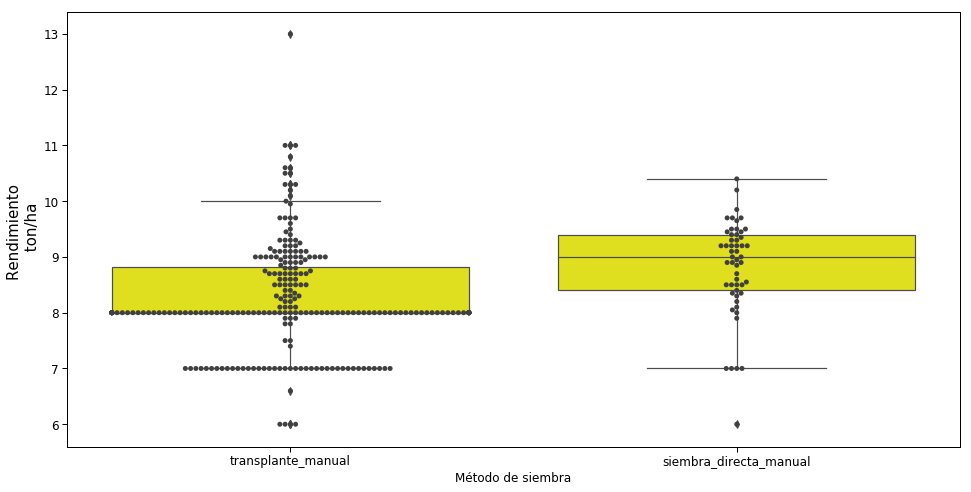

In [6]:
rend_selva = rendimiento.loc[(rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine'), ['Rendimiento', 'TecnicaSiembra']]


plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="TecnicaSiembra", y="Rendimiento", data=rend_selva, color = "yellow")
ax = sns.swarmplot(x="TecnicaSiembra", y="Rendimiento", data=rend_selva, color=".25")
ax.set_ylabel('Rendimiento \n ton/ha')
ax.set_xlabel("Método de siembra",fontsize=12)
ax.tick_params(labelsize=12)
ax.figure.savefig("GRAFICAS/Rendimiento_Selva.png")

In [7]:
data1 = rend_selva.loc[(rend_selva['TecnicaSiembra']=='transplante_manual'), "Rendimiento"]
data2 = rend_selva.loc[(rend_selva['TecnicaSiembra']=='siembra_directa_manual'), "Rendimiento"]

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-4.111, df=291, cv=1.650, p=0.000
Reject the null hypothesis that the means are equal.


# Numero de golpes
## Selva

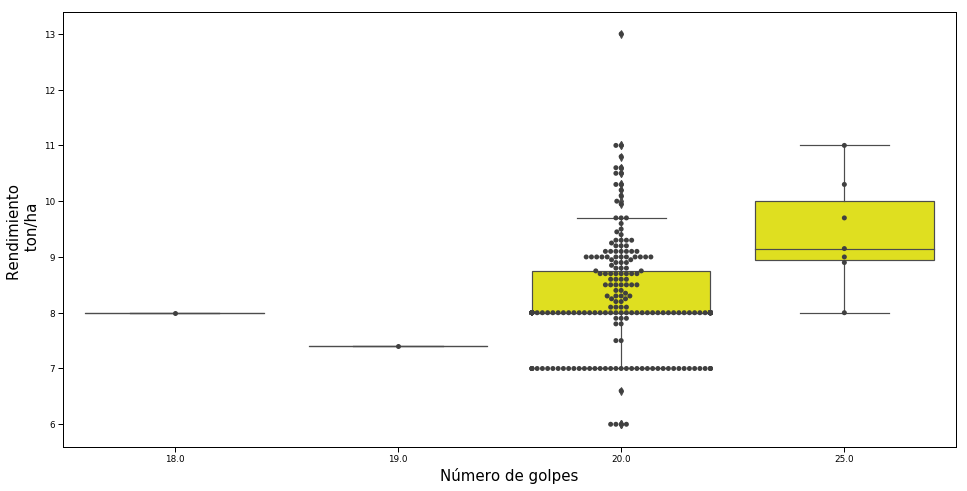

In [8]:
rend_selva_golpes  = rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual') & ((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['Rendimiento', 'NumeroGolpes']]
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="NumeroGolpes", y="Rendimiento", data=rend_selva_golpes , color = "yellow")
ax = sns.swarmplot(x="NumeroGolpes", y="Rendimiento", data=rend_selva_golpes , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='Número de golpes')
ax.figure.savefig("GRAFICAS/NumeroGolpes_Selva.png")


In [9]:
data1 = rend_selva_golpes.loc[(rend_selva_golpes['NumeroGolpes']==20), "Rendimiento"]
data2 = rend_selva_golpes.loc[(rend_selva_golpes['NumeroGolpes']==25), "Rendimiento"]

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-3.199, df=236, cv=1.651, p=0.002
Reject the null hypothesis that the means are equal.


## Costa

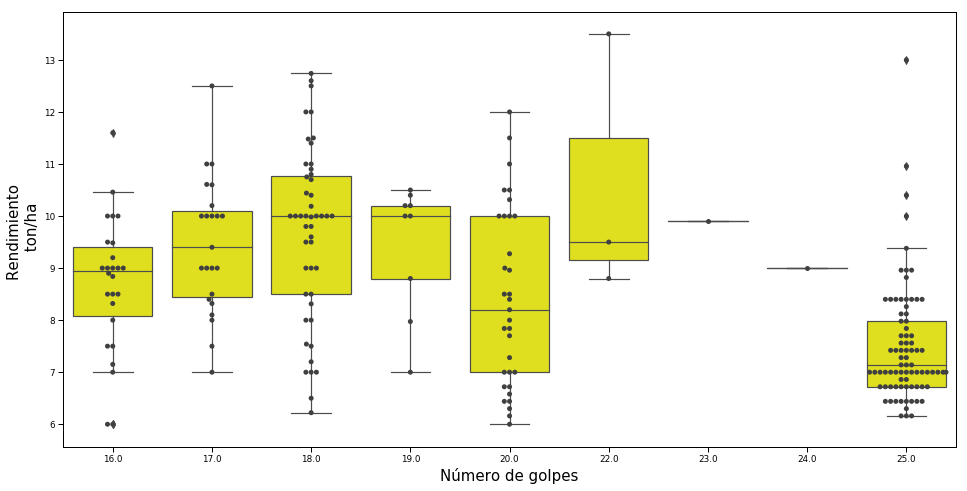

In [10]:
rend_costa_golpes  = rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual') & ((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['Rendimiento', 'NumeroGolpes']]
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="NumeroGolpes", y="Rendimiento", data=rend_costa_golpes , color = "yellow")
ax = sns.swarmplot(x="NumeroGolpes", y="Rendimiento", data=rend_costa_golpes , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='Número de golpes')
ax.figure.savefig("GRAFICAS/NumeroGolpes_Costa.png")

In [11]:
data1 = rend_costa_golpes.loc[(rend_costa_golpes['NumeroGolpes']==18), "Rendimiento"]
data2 = rend_costa_golpes.loc[(rend_costa_golpes['NumeroGolpes']==20), "Rendimiento"]

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=3.286, df=78, cv=1.665, p=0.002
Reject the null hypothesis that the means are equal.


# Fecha de emergencia

## Selva

Text(0, 0.5, 'Rendimiento \n ton/ha')

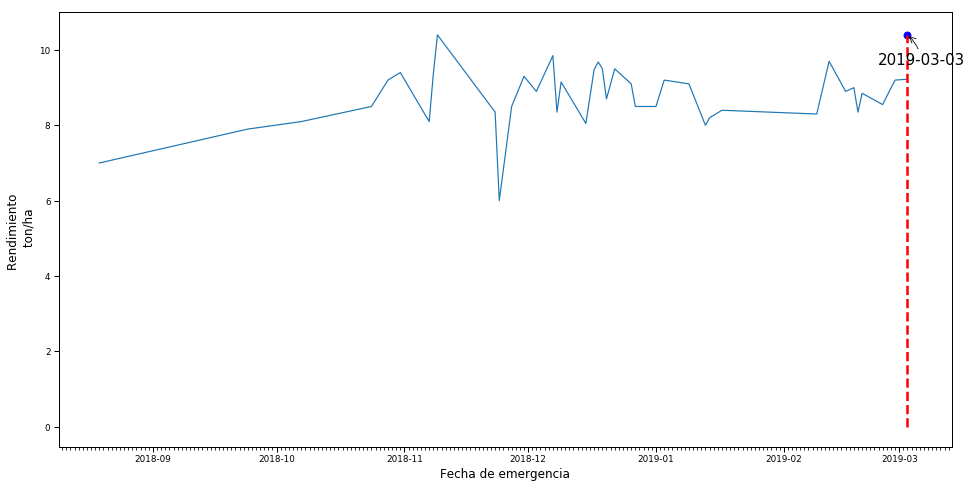

In [12]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()
years_fmt = mdates.DateFormatter('%Y-%m')

rend_fechasiembra_selva = rendimiento.loc[(rendimiento['TecnicaSiembra']=='siembra_directa_manual') & ((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['Rendimiento', 'FechaEmergencia']]
rend_fechasiembra_selva['FechaEmergencia'] =pd.to_datetime(rend_fechasiembra_selva['FechaEmergencia'])



rend_fechasiembra_selva.sort_values(by = ['FechaEmergencia'])
lista_fechasiembra = pd.DataFrame(rend_fechasiembra_selva.groupby(['FechaEmergencia'])['Rendimiento'].mean())
lista_fechasiembra.reset_index(inplace=True) 
lista_fechasiembra.shape
lista_fechasiembra['FechaEmergencia'].unique().shape



fig, ax = plt.subplots(figsize=(16, 8))
ax.plot('FechaEmergencia', 'Rendimiento', data=lista_fechasiembra)


t = lista_fechasiembra.max()[0]
rend = lista_fechasiembra.max()[1]
ax.plot([t, t], [0, rend ], color='red', linewidth=2.5, linestyle="--")
ax.scatter([t, ], [rend , ], 50, color='blue')
ax.annotate(str(t)[0:10],
            xy=(t, rend ), xycoords='data',
            xytext=(-30, -30), textcoords='offset points', fontsize=15,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# format the ticks
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
ax.set_xlabel("Fecha de emergencia",fontsize=12)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=12)


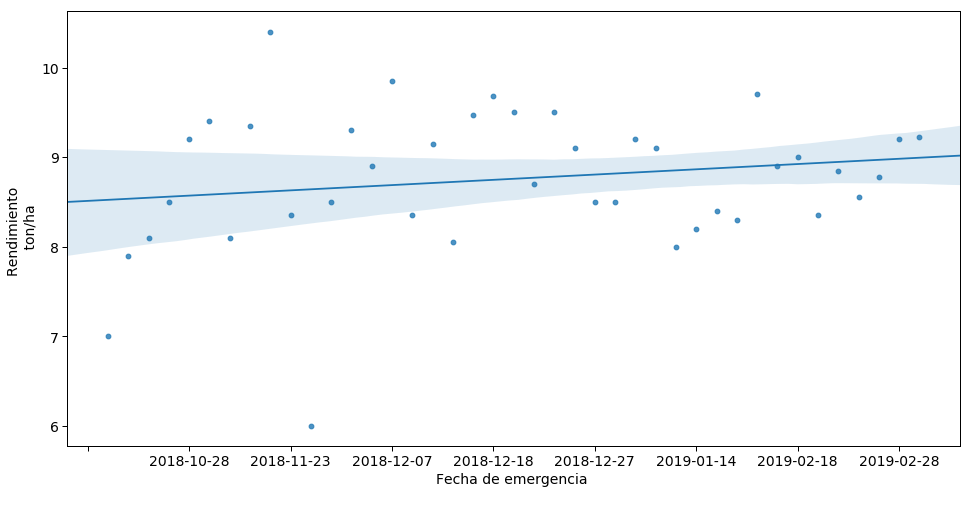

In [13]:
#timestamp_date_rng_2 = [datetime.strptime(x,'%Y-%m-%d') for x in lista_fechasiembra['FechaEmergencia']]
#timestamp_date_rng_2




fig, ax = plt.subplots(figsize=(16, 8))
#ax = sns.scatterplot(x='FechaEmergencia', y='Rendimiento', data=lista_fechasiembra)
#ax = sns.regplot(x='FechaEmergencia', y='Rendimiento', data=lista_fechasiembra)
#sns.lmplot('cycle_number', 'value', data=df, hue='variable', ci=None, order=2, truncate=True)


lista_fechasiembra = lista_fechasiembra.sort_values('FechaEmergencia')
lista_fechasiembra['date_f'] = pd.factorize(lista_fechasiembra['FechaEmergencia'])[0] + 1
mapping = dict(zip(lista_fechasiembra['date_f'], lista_fechasiembra['FechaEmergencia'].dt.date))

ax = sns.regplot('date_f', 'Rendimiento', data=lista_fechasiembra)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel("Fecha de emergencia \n",fontsize=14)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/FechaEmergencia_Selva.png")

#df = df.sort_values('date')
#df['date_f'] = pd.factorize(df['date'])[0] + 1
#mapping = dict(zip(df['date_f'], df['date'].dt.date))

#ax = sns.regplot('date_f', 'score', data=df)
#labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
#ax.set_xticklabels(labels)




#datenow = datetime.datetime.now()
#dstart = datetime.datetime(2018,7,1)
#dfinish = datetime.datetime(2019,6,1)
#ax.set(xlim=(dstart, dfinish))
#ax.tick_params(labelsize=14)
#ax.set_xlabel("Fecha de emergencia \n (Month - Year)",fontsize=14)
#ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
#ax.figure.savefig("GRAFICAS/FechaEmergencia_Selva.png")




#ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(days)


## Costa

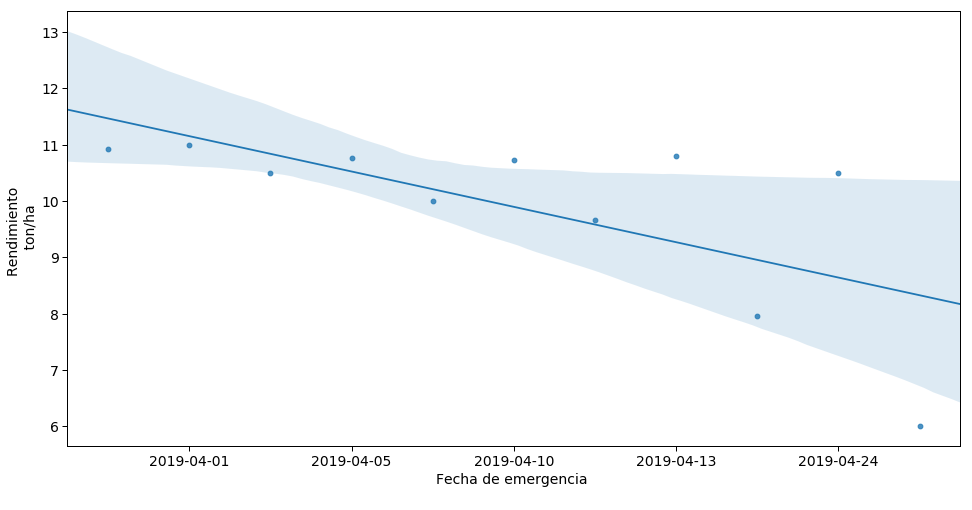

In [14]:
rend_fechasiembra_costa = rendimiento.loc[(rendimiento['TecnicaSiembra']=='siembra_directa_manual') & ((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['Rendimiento', 'FechaEmergencia']]
rend_fechasiembra_costa['FechaEmergencia'] =pd.to_datetime(rend_fechasiembra_costa['FechaEmergencia'])


rend_fechasiembra_costa.sort_values(by = ['FechaEmergencia'])
lista_fechasiembra_costa = pd.DataFrame(rend_fechasiembra_costa.groupby(['FechaEmergencia'])['Rendimiento'].mean())
lista_fechasiembra_costa.reset_index(inplace=True) 
lista_fechasiembra_costa.shape
lista_fechasiembra_costa['FechaEmergencia'].unique().shape




fig, ax = plt.subplots(figsize=(16, 8))

lista_fechasiembra_costa = lista_fechasiembra_costa.sort_values('FechaEmergencia')
lista_fechasiembra_costa['date_f'] = pd.factorize(lista_fechasiembra_costa['FechaEmergencia'])[0] + 1
mapping = dict(zip(lista_fechasiembra_costa['date_f'], lista_fechasiembra_costa['FechaEmergencia'].dt.date))

ax = sns.regplot('date_f', 'Rendimiento', data=lista_fechasiembra_costa)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel("Fecha de emergencia \n",fontsize=14)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/FechaEmergencia_Costa.png")







#ax = sns.scatterplot(x='FechaEmergencia', y='Rendimiento', data=lista_fechasiembra_costa)
#datenow = datetime.datetime.now()
#dstart = datetime.datetime(2018,7,1)
#dfinish = datetime.datetime(2019,6,1)
#ax.set(xlim=(dstart, dfinish))
#ax.tick_params(labelsize=14)
#ax.set_xlabel("Fecha de emergencia \n (Month - Year)",fontsize=14)
#ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
#ax.figure.savefig("GRAFICAS/FechaEmergencia_Costa.png")

#ax.xaxis.set_major_formatter(DateFormatter("%m/%d"))
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(days)





# Fecha de transplante 

## Selva

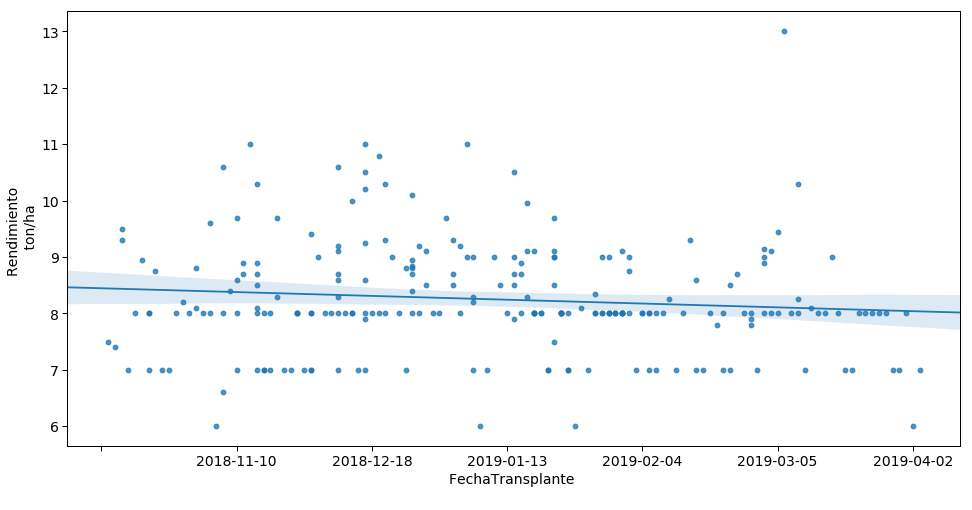

In [15]:
rend_fechatransplante_selva = rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual') &  ((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['Rendimiento', 'FechaTransplante']]
rend_fechatransplante_selva['FechaTransplante'] =pd.to_datetime(rend_fechatransplante_selva['FechaTransplante'])



rend_fechatransplante_selva.sort_values(by = ['FechaTransplante'])
lista_fechatransplante_selva = pd.DataFrame(rend_fechatransplante_selva.groupby(['FechaTransplante'])['Rendimiento'].mean())
lista_fechatransplante_selva.reset_index(inplace=True) 
lista_fechatransplante_selva.shape
lista_fechatransplante_selva['FechaTransplante'].unique().shape




# fig, ax = plt.subplots(figsize=(16, 8))
# ax = sns.scatterplot(x='FechaTransplante', y='Rendimiento', data=lista_fechatransplante_selva)
# #datenow = datetime.datetime.now()
# dstart = datetime.datetime(2018,7,1)
# dfinish = datetime.datetime(2019,6,1)
# ax.set(xlim=(dstart, dfinish))
# ax.tick_params(labelsize=14)
# ax.set_xlabel("FechaTransplante \n (Month - Year)",fontsize=14)
# ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
# ax.figure.savefig("GRAFICAS/FechaTransplante_Selva.png")



fig, ax = plt.subplots(figsize=(16, 8))

rend_fechatransplante_selva = rend_fechatransplante_selva.sort_values('FechaTransplante')
rend_fechatransplante_selva['date_f'] = pd.factorize(rend_fechatransplante_selva['FechaTransplante'])[0] + 1
mapping = dict(zip(rend_fechatransplante_selva['date_f'], rend_fechatransplante_selva['FechaTransplante'].dt.date))

ax = sns.regplot('date_f', 'Rendimiento', data=rend_fechatransplante_selva)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel("FechaTransplante \n",fontsize=14)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/FechaTransplante_Selva.png")





















# Costa

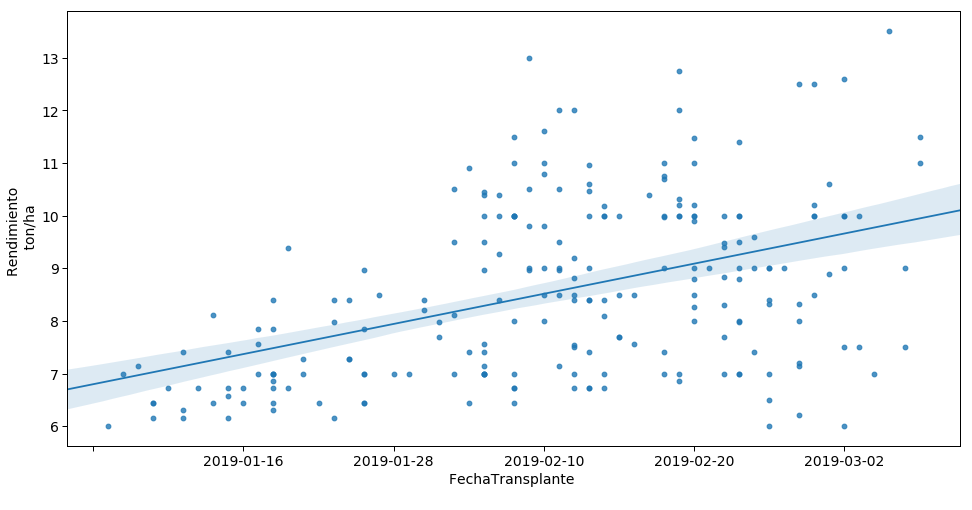

In [16]:
rend_fechatransplante_costa = rendimiento.loc[(rendimiento['TecnicaSiembra']=='transplante_manual') &   ((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['Rendimiento', 'FechaTransplante']]
rend_fechatransplante_costa['FechaTransplante'] =pd.to_datetime(rend_fechatransplante_costa['FechaTransplante'])



rend_fechatransplante_costa.sort_values(by = ['FechaTransplante'])
lista_fechatransplante_costa = pd.DataFrame(rend_fechatransplante_costa.groupby(['FechaTransplante'])['Rendimiento'].mean())
lista_fechatransplante_costa.reset_index(inplace=True) 
lista_fechatransplante_costa.shape
lista_fechatransplante_costa['FechaTransplante'].unique().shape


# rend_fechatransplante_costa

# fig, ax = plt.subplots(figsize=(16, 8))
# ax = sns.scatterplot(x='FechaTransplante', y='Rendimiento', data=lista_fechatransplante_costa)
# #datenow = datetime.datetime.now()
# dstart = datetime.datetime(2018,7,1)
# dfinish = datetime.datetime(2019,6,1)
# ax.set(xlim=(dstart, dfinish))
# ax.tick_params(labelsize=14)
# ax.set_xlabel("FechaTransplante \n (Month - Year)",fontsize=14)
# ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
# ax.figure.savefig("GRAFICAS/FechaTransplante_Costa.png")



fig, ax = plt.subplots(figsize=(16, 8))

rend_fechatransplante_costa = rend_fechatransplante_costa.sort_values('FechaTransplante')
rend_fechatransplante_costa['date_f'] = pd.factorize(rend_fechatransplante_costa['FechaTransplante'])[0] + 1
mapping = dict(zip(rend_fechatransplante_costa['date_f'], rend_fechatransplante_costa['FechaTransplante'].dt.date))

ax = sns.regplot('date_f', 'Rendimiento', data=rend_fechatransplante_costa)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel("FechaTransplante \n",fontsize=14)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/FechaTransplante_Costa.png")





























# Tipo de Irrigación 

## Costa

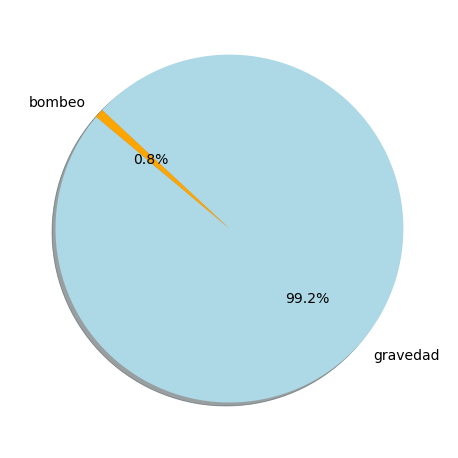

In [17]:
irrigacion_costa = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['TipoIrrigacion']]
contar_costa =collections.Counter(irrigacion_costa['TipoIrrigacion'])
df_costa = pd.DataFrame.from_dict(contar_costa, orient='index').reset_index()
df_costa =df_costa.rename(columns={'index':'Tipo_Irrigacion', 0:'Cantidad'})

fig, ax = plt.subplots(figsize=(16, 8))
colors  = ("lightblue", "orange")
plt.pie(df_costa['Cantidad'],labels=df_costa['Tipo_Irrigacion'],
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14}, colors=colors)
ax.figure.savefig("GRAFICAS/TipoIrrigacion_Costa.png")


## Selva

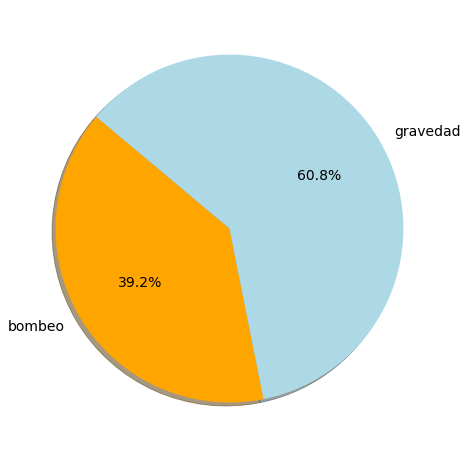

In [18]:
irrigacion_selva = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['TipoIrrigacion']]
contar_selva =collections.Counter(irrigacion_selva['TipoIrrigacion'])
df_selva = pd.DataFrame.from_dict(contar_selva, orient='index').reset_index()
df_selva =df_selva.rename(columns={'index':'Tipo_Irrigacion', 0:'Cantidad'})

fig, ax = plt.subplots(figsize=(16, 8))
colors  = ("orange","lightblue")
plt.pie(df_selva['Cantidad'],labels=df_selva['Tipo_Irrigacion'],
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14}, colors=colors)
ax.figure.savefig("GRAFICAS/TipoIrrigacion_Selva.png")

# Cantidad de Irrigaciones

## Selva


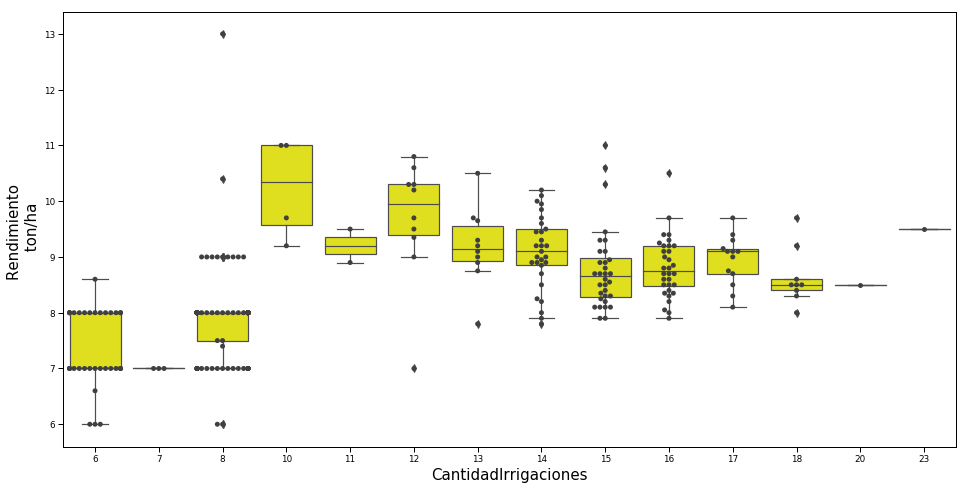

In [19]:
cantidadirrigacion_selva = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['CantidadIrrigaciones', 'Rendimiento']]


#plt.figure(figsize=(16, 8))
#ax = sns.boxplot(x="CantidadIrrigaciones", y="Rendimiento", data=cantidadirrigacion_selva)


plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="CantidadIrrigaciones", y="Rendimiento", data=cantidadirrigacion_selva , color = "yellow")
ax = sns.swarmplot(x="CantidadIrrigaciones", y="Rendimiento", data=cantidadirrigacion_selva  , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='CantidadIrrigaciones')
ax.figure.savefig("GRAFICAS/CantidadIrrigaciones_Selva.png")





## Costa

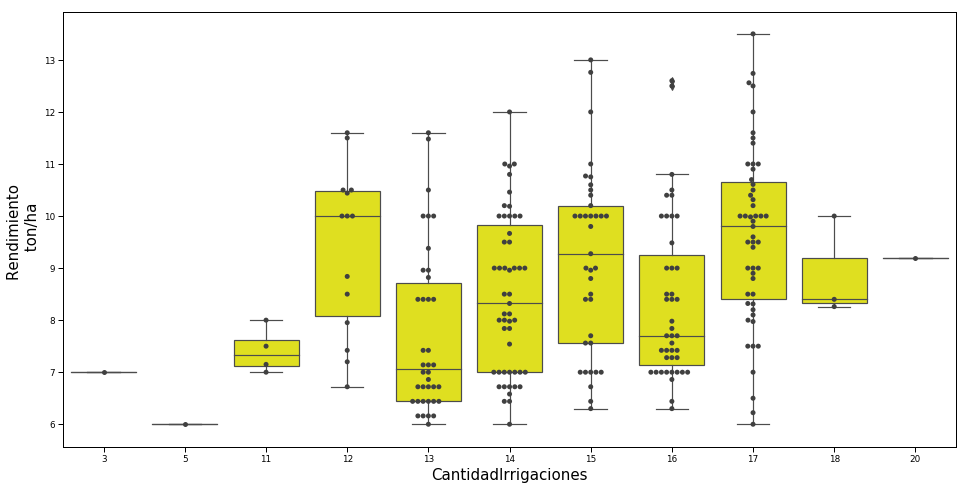

In [20]:
cantidadirrigacion_costa = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['CantidadIrrigaciones', 'Rendimiento']]



plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="CantidadIrrigaciones", y="Rendimiento", data=cantidadirrigacion_costa , color = "yellow")
ax = sns.swarmplot(x="CantidadIrrigaciones", y="Rendimiento", data=cantidadirrigacion_costa  , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='CantidadIrrigaciones')
ax.figure.savefig("GRAFICAS/CantidadIrrigaciones_Costa.png")



## Variedades

## Selva

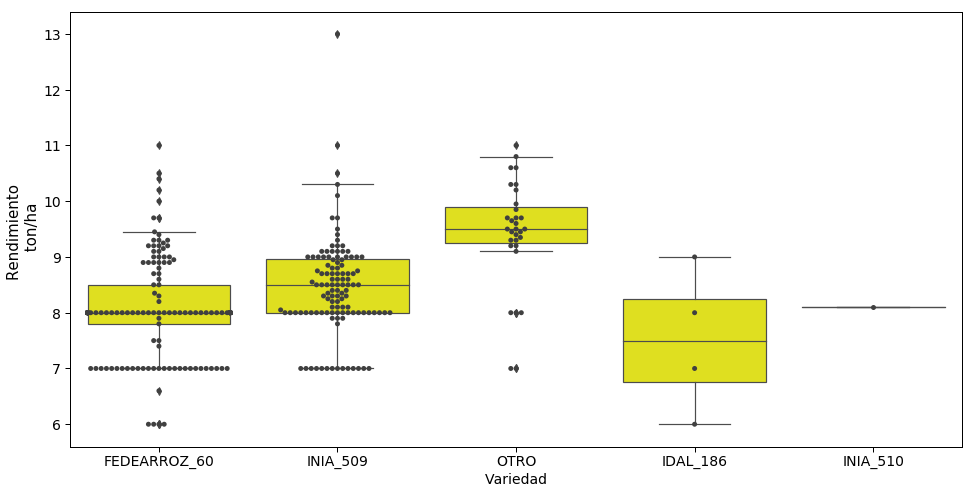

In [21]:
semillas_selva = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Waldemar')| (rendimiento['Tecnico_Nombre']=='Dante Levine')), ['NombreSemilla', 'Rendimiento']]
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="NombreSemilla", y="Rendimiento", data=semillas_selva  , color = "yellow")
ax = sns.swarmplot(x="NombreSemilla", y="Rendimiento", data=semillas_selva   , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='NombreSemilla')
ax.set_xlabel("Variedad",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/Variedades_Selva.png")



## Costa

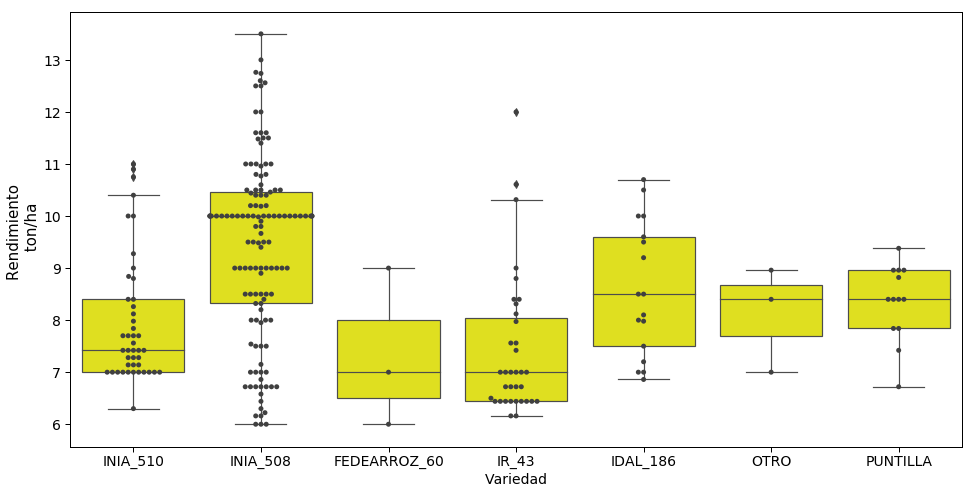

In [22]:
semillas_costa = rendimiento.loc[((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['NombreSemilla', 'Rendimiento']]
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="NombreSemilla", y="Rendimiento", data=semillas_costa  , color = "yellow")
ax = sns.swarmplot(x="NombreSemilla", y="Rendimiento", data=semillas_costa   , color=".25")
ax.set(ylabel='Rendimiento \n ton/ha', xlabel='NombreSemilla')
ax.set_xlabel("Variedad",fontsize=14)
ax.tick_params(labelsize=14)
ax.figure.savefig("GRAFICAS/Variedades_Costa.png")

# Manejo de residuos

## Selva

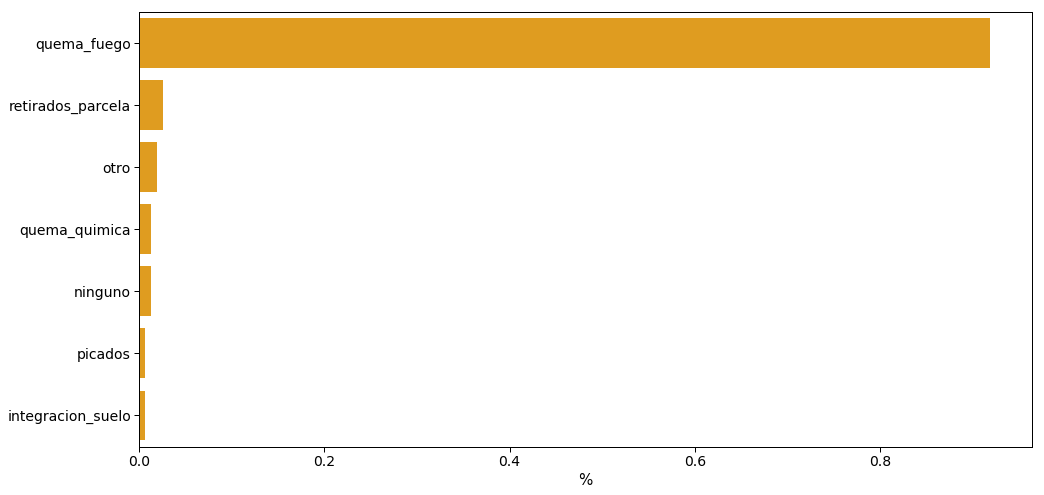

In [36]:
residuos = pd.read_csv("BASEDATOS_MANEJORESIDUOS.csv", encoding = charenc)
residuos_selva = residuos.loc[((residuos['Tecnico_Nombre']=='Waldemar')| (residuos['Tecnico_Nombre']=='Dante Levine')), ['TipoManejoResiduos']]

contar_selva_residuos =collections.Counter(residuos_selva['TipoManejoResiduos'])
df_selva = pd.DataFrame.from_dict(contar_selva_residuos , orient='index').reset_index()
df_selva =df_selva.rename(columns={'index':'Manejo_Residuos', 0:'Cantidad'})
df_selva['perc']= df_selva['Cantidad']/df_selva['Cantidad'].sum()
df_selva= df_selva.sort_values('perc', ascending=False)


fig, ax = plt.subplots(figsize=(16, 8))
#plt.pie(df_selva['Cantidad'],labels=df_selva['Manejo_Residuos'],
#autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 8})
#ax.tick_params(labelsize=9)
#ax.figure.savefig("GRAFICAS/TipoIrrigacion_Selva.png")

ax = sns.barplot(y="Manejo_Residuos", x="perc", data=df_selva,color="orange")
#ax.barh(Manejo_Residuos, Cantidad, align='center')
ax.tick_params(labelsize=14)
ax.set(ylabel='', xlabel='%')
ax.figure.savefig("GRAFICAS/ManejoResiduos_Selva.png")


## Costa

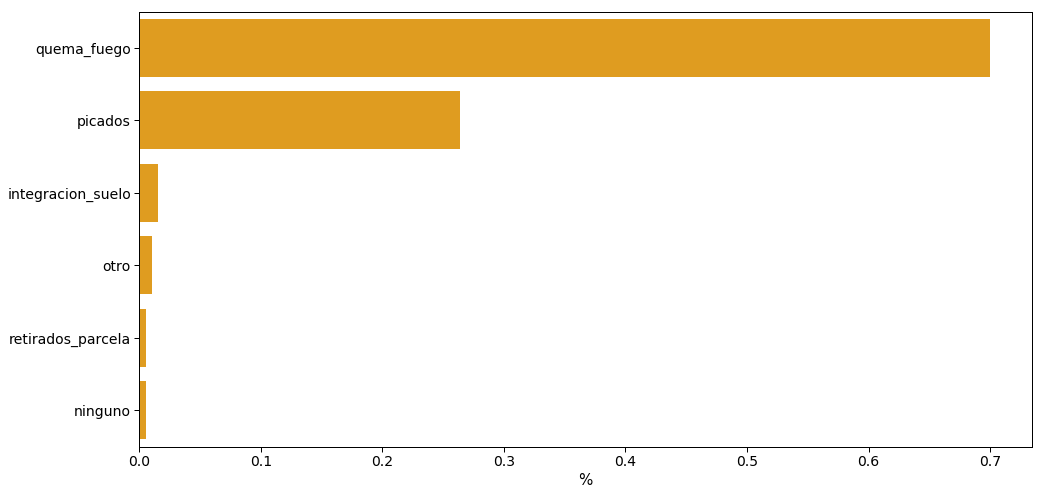

In [37]:

residuos_costa = residuos.loc[((rendimiento['Tecnico_Nombre']=='Darwin Steward')| (rendimiento['Tecnico_Nombre']=='Wilmer Eduardo')), ['TipoManejoResiduos']]

contar_costa_residuos =collections.Counter(residuos_costa['TipoManejoResiduos'])
df_costa = pd.DataFrame.from_dict(contar_costa_residuos , orient='index').reset_index()
df_costa =df_costa.rename(columns={'index':'Manejo_Residuos', 0:'Cantidad'})
df_costa['perc']= df_costa['Cantidad']/df_costa['Cantidad'].sum()
df_costa= df_costa.sort_values('perc', ascending=False)


fig, ax = plt.subplots(figsize=(16, 8))
#plt.pie(df_selva['Cantidad'],labels=df_selva['Manejo_Residuos'],
#autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 8})
#ax.tick_params(labelsize=9)
#ax.figure.savefig("GRAFICAS/TipoIrrigacion_Selva.png")

ax = sns.barplot(y="Manejo_Residuos", x="perc", data=df_costa,color="orange")
#ax.barh(Manejo_Residuos, Cantidad, align='center')
ax.tick_params(labelsize=14)
ax.set(ylabel='', xlabel='%')
ax.figure.savefig("GRAFICAS/ManejoResiduos_Costa.png")

## Fertilizacion 

## Selva

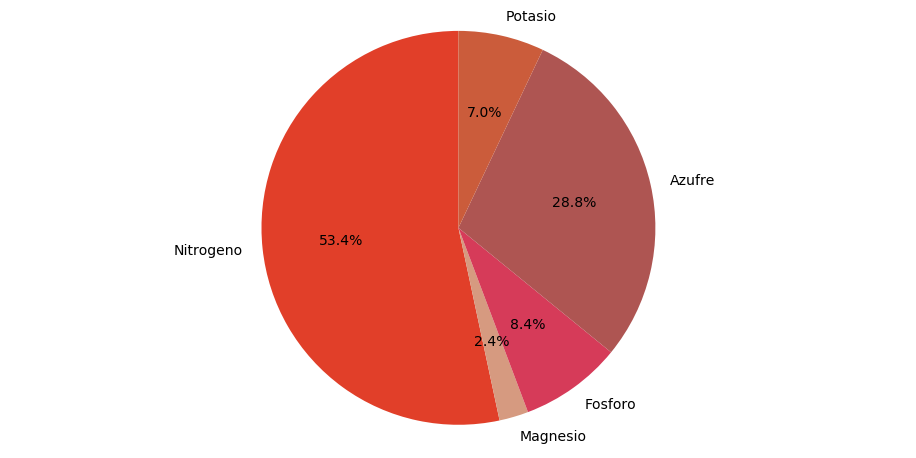

In [25]:
fertilizacion = pd.read_csv("BASEDATOS_FERTILIZACION.csv", encoding = charenc)
fertilizacion = fertilizacion.loc[((fertilizacion['Tecnico_Nombre']=='Waldemar')| (residuos['Tecnico_Nombre']=='Dante Levine')),]



fertilizacion['Nitrogeno'] = fertilizacion['PorcentajeNitrogeno']*fertilizacion['CantidadProducto']/100
fertilizacion['Magnesio'] = fertilizacion['PorcentajeMagnesio']*fertilizacion['CantidadProducto']/100
fertilizacion['Fosforo'] = fertilizacion['PorcentajeFosforo']*fertilizacion['CantidadProducto']/100
fertilizacion['Azufre'] = fertilizacion['PorcentajeAzufre']*fertilizacion['CantidadProducto']/100
fertilizacion['Potasio'] = fertilizacion['PorcentajePotasio']*fertilizacion['CantidadProducto']/100
fertilizacion['Calcio'] = fertilizacion['PorcentajeCalcio']*fertilizacion['CantidadProducto']/100


suma_nitrogeno = fertilizacion['Nitrogeno'].sum()
suma_magnesio = fertilizacion['Magnesio'].sum()
suma_fosforo = fertilizacion['Fosforo'].sum()
suma_azufre = fertilizacion['Azufre'].sum()
suma_potasio = fertilizacion['Potasio'].sum()
suma_calcio = fertilizacion['Calcio'].sum()

resumen_fertilizacion = {'Elemento': ['Nitrogeno','Magnesio', 'Fosforo', 'Azufre', 'Potasio'], 
                        'Cantidad' : [suma_nitrogeno, suma_magnesio, suma_fosforo, suma_azufre, suma_potasio]}

resumen_fertilizacion = pd.DataFrame(resumen_fertilizacion)

resumen_fertilizacion.sort_values(by=['Cantidad'], ascending=False)

#fig = go.Figure(data=[go.Pie(labels=list(contar.keys()), values=list(contar.values()),hole=.3)])
#fig.update_layout(title_text='Manejo de Residuos')
#fig.show()

colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

fig, ax = plt.subplots(figsize=(16, 8))

# Create a pie chart
plt.pie(
    # using data total)arrests
    resumen_fertilizacion['Cantidad'],
    # with the labels being officer names
    labels=resumen_fertilizacion['Elemento'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    radius =10,  textprops={'fontsize': 14}
    )


# View the plot drop above
plt.axis('equal')
plt.tick_params(labelsize=14)
# View the plot
plt.show()
ax.figure.savefig("GRAFICAS/Fertilizacion_Selva.png")


## Costa

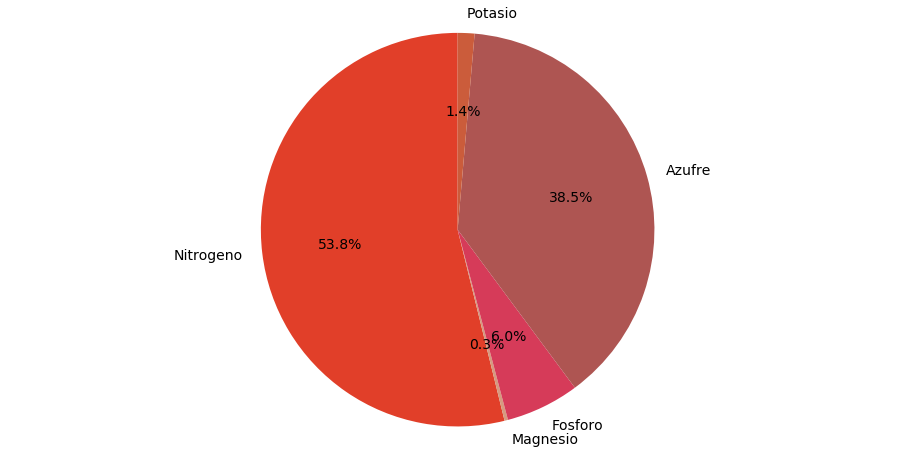

In [26]:
fertilizacion = pd.read_csv("BASEDATOS_FERTILIZACION.csv", encoding = charenc)
fertilizacion = fertilizacion.loc[((fertilizacion['Tecnico_Nombre']=='Darwin Steward')| (fertilizacion['Tecnico_Nombre']=='Wilmer Eduardo')),]



fertilizacion['Nitrogeno'] = fertilizacion['PorcentajeNitrogeno']*fertilizacion['CantidadProducto']/100
fertilizacion['Magnesio'] = fertilizacion['PorcentajeMagnesio']*fertilizacion['CantidadProducto']/100
fertilizacion['Fosforo'] = fertilizacion['PorcentajeFosforo']*fertilizacion['CantidadProducto']/100
fertilizacion['Azufre'] = fertilizacion['PorcentajeAzufre']*fertilizacion['CantidadProducto']/100
fertilizacion['Potasio'] = fertilizacion['PorcentajePotasio']*fertilizacion['CantidadProducto']/100
fertilizacion['Calcio'] = fertilizacion['PorcentajeCalcio']*fertilizacion['CantidadProducto']/100


suma_nitrogeno = fertilizacion['Nitrogeno'].sum()
suma_magnesio = fertilizacion['Magnesio'].sum()
suma_fosforo = fertilizacion['Fosforo'].sum()
suma_azufre = fertilizacion['Azufre'].sum()
suma_potasio = fertilizacion['Potasio'].sum()
suma_calcio = fertilizacion['Calcio'].sum()

resumen_fertilizacion = {'Elemento': ['Nitrogeno','Magnesio', 'Fosforo', 'Azufre', 'Potasio'], 
                        'Cantidad' : [suma_nitrogeno, suma_magnesio, suma_fosforo, suma_azufre, suma_potasio]}

resumen_fertilizacion = pd.DataFrame(resumen_fertilizacion)

resumen_fertilizacion.sort_values(by=['Cantidad'], ascending=False)

#fig = go.Figure(data=[go.Pie(labels=list(contar.keys()), values=list(contar.values()),hole=.3)])
#fig.update_layout(title_text='Manejo de Residuos')
#fig.show()

colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

fig, ax = plt.subplots(figsize=(16, 8))

# Create a pie chart
plt.pie(
    # using data total)arrests
    resumen_fertilizacion['Cantidad'],
    # with the labels being officer names
    labels=resumen_fertilizacion['Elemento'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    radius =10,  textprops={'fontsize': 14}
    )


# View the plot drop above
plt.axis('equal')
plt.tick_params(labelsize=14)
# View the plot
plt.show()
ax.figure.savefig("GRAFICAS/Fertilizacion_Costa.png")


# Arroz Rojo

## Selva


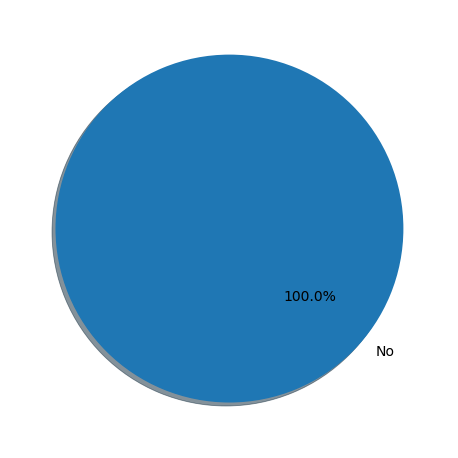

In [27]:
monitoreo = pd.read_csv("BASEDATOS_MONITOREOPLAGASENFER.csv", encoding = charenc)
monitoreo_transpla_arrozrojo = monitoreo.loc[((monitoreo['Tecnico_Nombre']=='Waldemar') | (monitoreo['Tecnico_Nombre']=='Dante Levine')), ['HayPresenciaArrozRojo']]
contar_arroz =collections.Counter(monitoreo_transpla_arrozrojo['HayPresenciaArrozRojo'])
df_selva = pd.DataFrame.from_dict(contar_arroz, orient='index').reset_index()
df_selva =df_selva.rename(columns={'index':'Presencia_ArrozRojo', 0:'Cantidad'})

df_selva

fig, ax = plt.subplots(figsize=(16, 8))
plt.pie(df_selva['Cantidad'],labels=df_selva['Presencia_ArrozRojo'],
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
ax.figure.savefig("GRAFICAS/Presencia_ArrozRojo_Selva.png")



## Costa

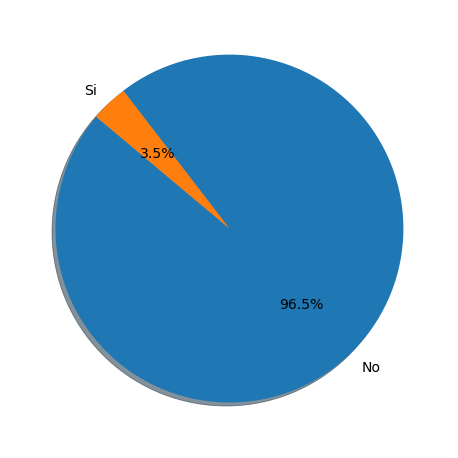

In [28]:
monitoreo = pd.read_csv("BASEDATOS_MONITOREOPLAGASENFER.csv", encoding = charenc)
monitoreo_transpla_arrozrojo = monitoreo.loc[((monitoreo['Tecnico_Nombre']=='Darwin Steward')| (monitoreo['Tecnico_Nombre']=='Wilmer Eduardo')), ['HayPresenciaArrozRojo']]
contar_arroz =collections.Counter(monitoreo_transpla_arrozrojo['HayPresenciaArrozRojo'])
df_selva = pd.DataFrame.from_dict(contar_arroz, orient='index').reset_index()
df_selva =df_selva.rename(columns={'index':'Presencia_ArrozRojo', 0:'Cantidad'})

df_selva

fig, ax = plt.subplots(figsize=(16, 8))
plt.pie(df_selva['Cantidad'],labels=df_selva['Presencia_ArrozRojo'],
autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14})
ax.figure.savefig("GRAFICAS/Presencia_ArrozRojo_Costa.png")

# Plagas y enfermedades

## Selva 

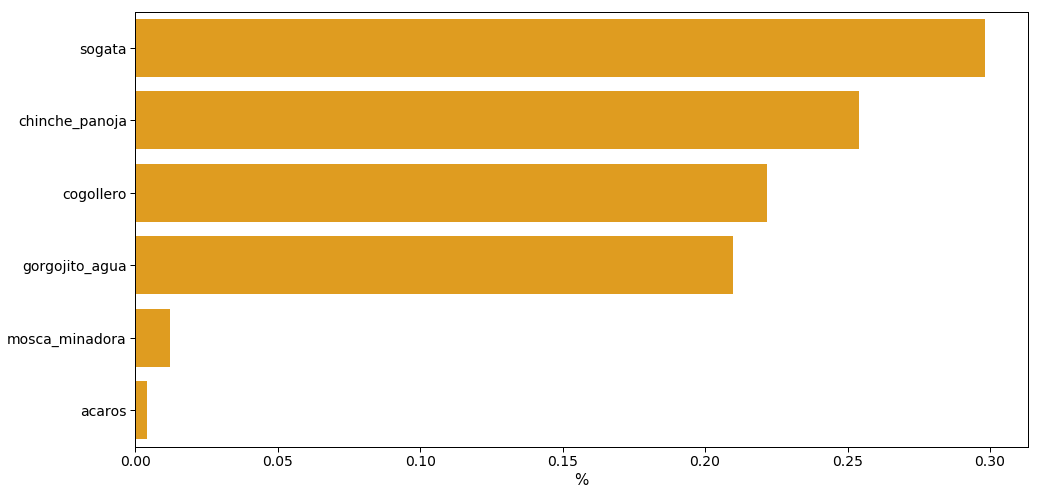

In [39]:
monitoreo_plagas_selva = monitoreo.loc[((monitoreo['Tecnico_Nombre']=='Waldemar') | (monitoreo['Tecnico_Nombre']=='Dante Levine')), ['ManejoFitosaPlagaEncontrada']]

monitoreo_plagas_selva =collections.Counter(monitoreo_plagas_selva['ManejoFitosaPlagaEncontrada'])
df_selva = pd.DataFrame.from_dict(monitoreo_plagas_selva , orient='index').reset_index()
df_selva =df_selva.rename(columns={'index':'ManejoFitosaPlagaEncontrada', 0:'Cantidad'})
df_selva = df_selva.iloc[1:, ]
df_selva['perc']= df_selva['Cantidad']/df_selva['Cantidad'].sum()
df_selva = df_selva.sort_values('perc', ascending=False)

df_selva
fig, ax = plt.subplots(figsize=(16, 8))
#plt.pie(df_selva['Cantidad'],labels=df_selva['ManejoFitosaPlagaEncontrada'],
#autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 8})
#ax.tick_params(labelsize=9)
#ax.figure.savefig("GRAFICAS/TipoIrrigacion_Selva.png")

ax = sns.barplot(y="ManejoFitosaPlagaEncontrada", x="perc", data=df_selva,color="orange")
ax.tick_params(labelsize=14)
ax.set(ylabel='', xlabel='%')
ax.figure.savefig("GRAFICAS/EnfermedadesPlagas_Selva.png")

## Costa

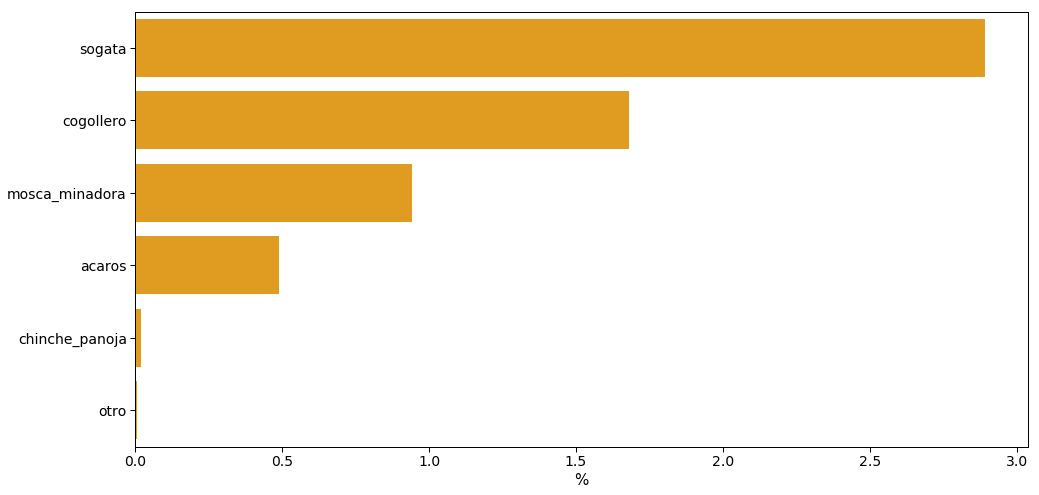

In [38]:
monitoreo_plagas_costa = monitoreo.loc[((monitoreo['Tecnico_Nombre']=='Darwin Steward')| (monitoreo['Tecnico_Nombre']=='Wilmer Eduardo')), ['ManejoFitosaPlagaEncontrada']]

monitoreo_plagas_costa =collections.Counter(monitoreo_plagas_costa['ManejoFitosaPlagaEncontrada'])
df_costa = pd.DataFrame.from_dict(monitoreo_plagas_costa, orient='index').reset_index()
df_costa =df_costa.rename(columns={'index':'ManejoFitosaPlagaEncontrada', 0:'Cantidad'})
df_costa = df_costa.drop(df_costa.index[1])
df_costa['perc']= df_costa['Cantidad']/df_selva['Cantidad'].sum()
df_costa = df_costa.sort_values('perc', ascending=False)

df_selva
fig, ax = plt.subplots(figsize=(16, 8))
#plt.pie(df_selva['Cantidad'],labels=df_selva['ManejoFitosaPlagaEncontrada'],
#autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 8})
#ax.tick_params(labelsize=9)
#ax.figure.savefig("GRAFICAS/TipoIrrigacion_Selva.png")

ax = sns.barplot(y="ManejoFitosaPlagaEncontrada", x="perc", data=df_costa,color="orange")
ax.tick_params(labelsize=14)
ax.set(ylabel='', xlabel='%')
ax.figure.savefig("GRAFICAS/EnfermedadesPlagas_Costa.png")

# Hacienda el potrero

In [83]:
cosechas = pd.read_csv("Fechas de cosechas.csv", encoding = charenc)

count         1537
unique          16
top       EL VALOR
freq           349
Name: fundo, dtype: object

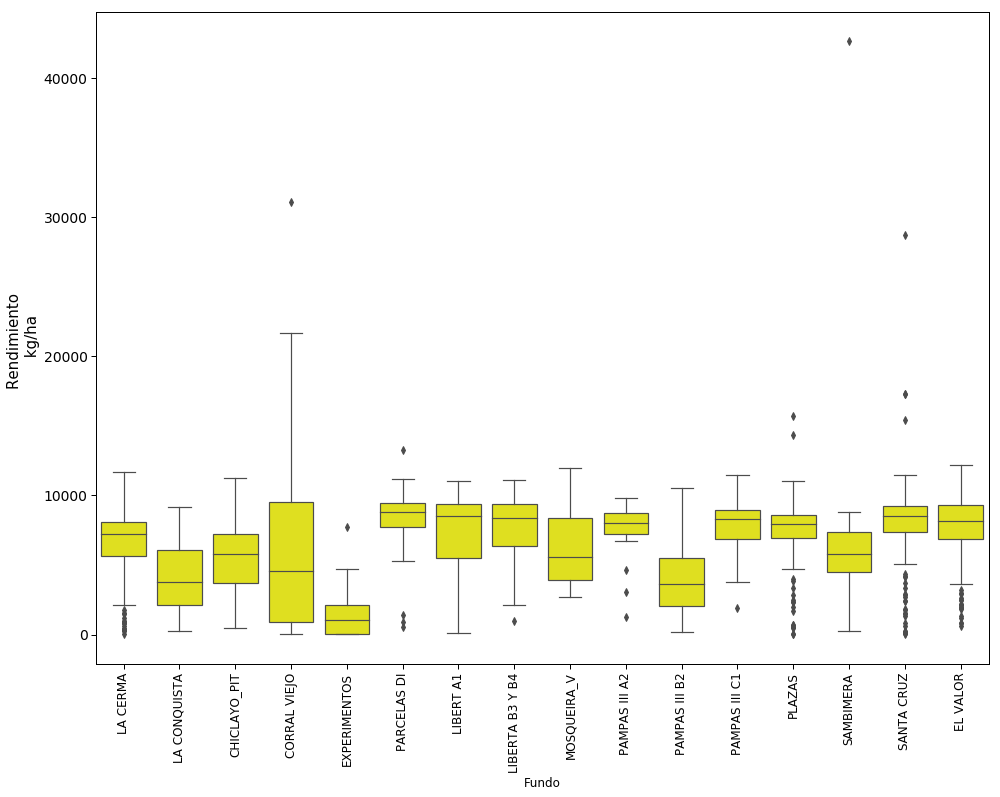

In [91]:
cosechas['Rendimiento'] = cosechas['kg']/cosechas[' area ']
plt.figure(figsize=(16, 12))
ax = sns.boxplot(x="fundo", y="Rendimiento", data=cosechas  , color = "yellow")
#ax = sns.swarmplot(x="fundo", y="Rendimiento", data=cosechas  , color=".7")
ax.set(ylabel='Rendimiento \n kg/ha', xlabel='Fundo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=12)
plt.yticks(fontsize=14)
ax.set_xlabel("Fundo",fontsize=12)
ax.figure.savefig("GRAFICAS/Rendimiento_Fundo_HaciPot.png")


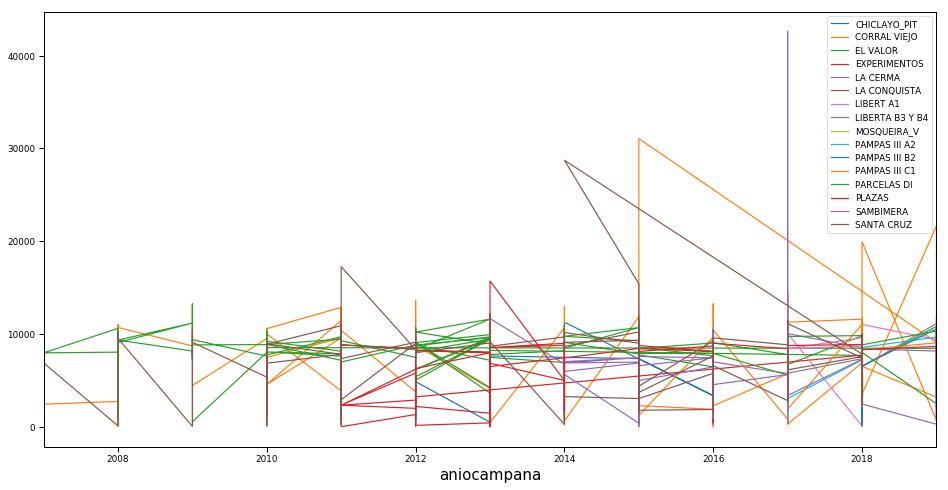

In [86]:
fig, ax = plt.subplots(figsize=(16, 8))
for key, grp in cosechas.groupby(['fundo']):
    ax = grp.plot(ax=ax, kind='line', x='aniocampana', y='Rendimiento', label=key)

plt.legend(loc='best')
plt.show()

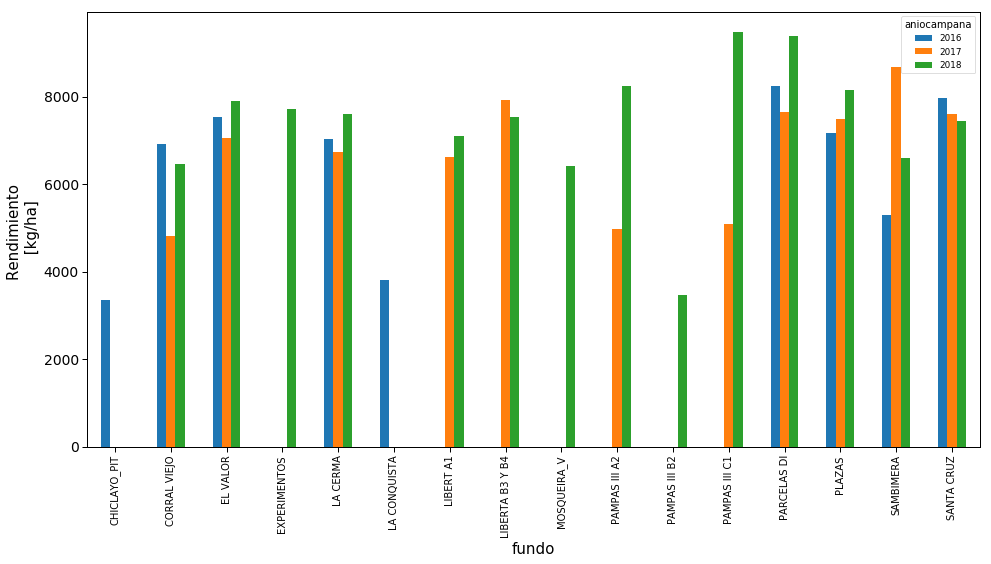

In [105]:
anios = cosechas[(cosechas['aniocampana']==2018) | (cosechas['aniocampana']==2017) | (cosechas['aniocampana']==2016)]

promedio_anios = anios.groupby(['fundo', 'aniocampana'], as_index=False).agg({"Rendimiento": "mean"})
datos = promedio_anios.pivot(index='fundo', columns='aniocampana', values='Rendimiento')


#dataframe_barplot = pd.DataFrame({'speed': speed,
#                    'lifespan': lifespan}, index=index)
#fig, ax = plt.subplots(figsize=(16, 8))
ax = datos.plot.bar(rot=0,figsize=(16, 8))
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel('Rendimiento \n [kg/ha]')
ax.figure.savefig("GRAFICAS/Rendimiento_Fundo_Anhos.png")



In [106]:

datos

aniocampana,2016,2017,2018
fundo,,,
CHICLAYO_PIT,3360.000000,NaN,NaN
CORRAL VIEJO,6925.715744,4824.028736,6462.688761
EL VALOR,7526.892198,7058.528392,7904.590440
EXPERIMENTOS,NaN,NaN,7722.000000
LA CERMA,7034.576585,6731.382183,7605.230995
LA CONQUISTA,3817.833333,NaN,NaN
LIBERT A1,NaN,6629.188040,7102.919776
LIBERTA B3 Y B4,NaN,7926.383182,7532.616385
MOSQUEIRA_V,NaN,NaN,6414.654973


## Variedad

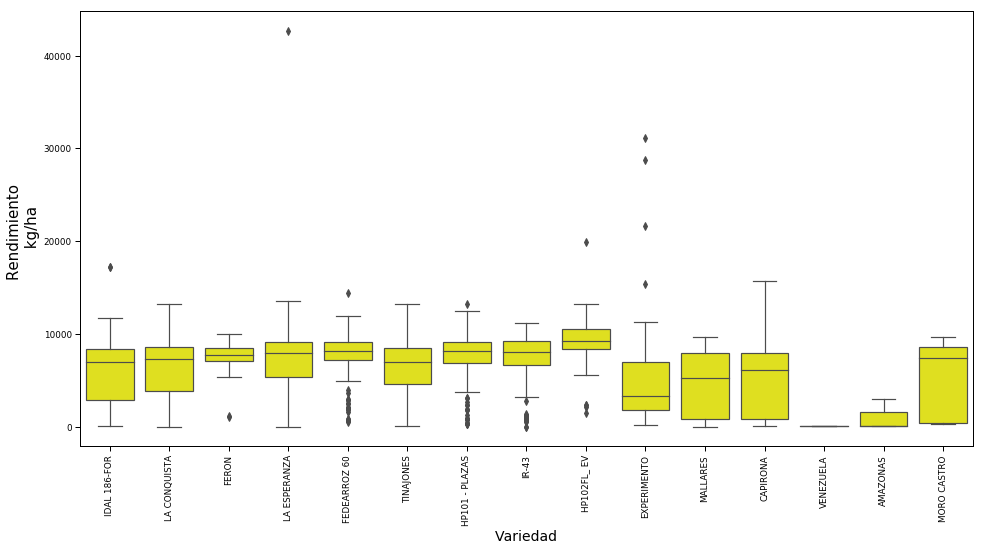

In [89]:
plt.figure(figsize=(16, 8))
ax = sns.boxplot(x="variedad", y="Rendimiento", data=cosechas  , color = "yellow")
#ax = sns.swarmplot(x="variedad", y="Rendimiento", data=cosechas  , color=".75")
ax.set(ylabel='Rendimiento \n kg/ha', xlabel='Variedad')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel("Variedad",fontsize=14)
ax.figure.savefig("GRAFICAS/Rendimiento_Variedad_HaciPot.png")

## Fecha de siembra

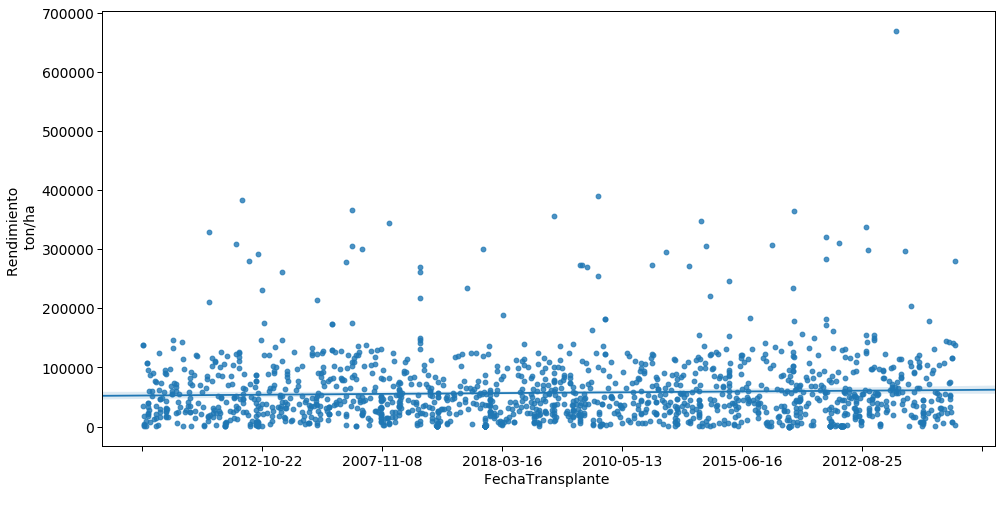

In [34]:

fig, ax = plt.subplots(figsize=(16, 8))

fechasiembra = cosechas.sort_values('fecha_siembra')
fechasiembra['date_f'] = pd.factorize(fechasiembra['fecha_siembra'])[0] + 1
fechasiembra['fecha_siembra'] = pd.to_datetime(fechasiembra['fecha_siembra'], format = '%m/%d/%Y')
mapping = dict(zip(fechasiembra['date_f'], fechasiembra['fecha_siembra'].dt.date))


ax = sns.regplot('date_f', 'kg', data=fechasiembra)
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.set_xlabel("FechaTransplante \n",fontsize=14)
ax.set_ylabel("Rendimiento \n ton/ha",fontsize=14)
ax.tick_params(labelsize=14)
#ax.figure.savefig("GRAFICAS/FechaTransplante_Costa.png")

In [92]:
promedio_anios = anios.groupby(['fundo'], as_index=False).agg({"Rendimiento": "mean"})

In [98]:
promedio_anios.sort_values(by =['Rendimiento'])



,fundo,Rendimiento
0,CHICLAYO_PIT,3360.000000
10,PAMPAS III B2,3471.748342
5,LA CONQUISTA,3817.833333
1,CORRAL VIEJO,6370.587858
8,MOSQUEIRA_V,6414.654973
14,SAMBIMERA,6827.184178
6,LIBERT A1,6853.587283
9,PAMPAS III A2,7006.797321
4,LA CERMA,7126.501861
2,EL VALOR,7436.873512


In [109]:
promedio_anios_variedad = anios.groupby(['variedad'], as_index=False).agg({"Rendimiento": "mean"})
promedio_anios_variedad.sort_values(by =['Rendimiento'])

,variedad,Rendimiento
7,MALLARES,3576.988090
0,EXPERIMENTO,4630.184127
8,TINAJONES,5643.490041
4,IDAL 186-FOR,5835.507400
5,IR-43,6206.912242
6,LA ESPERANZA,6791.180379
2,HP101 - PLAZAS,7666.851892
1,FEDEARROZ 60,7717.277967
3,HP102FL_ EV,9015.082150


In [108]:
promedio_anios 

,variedad,Rendimiento
0,EXPERIMENTO,4630.184127
1,FEDEARROZ 60,7717.277967
2,HP101 - PLAZAS,7666.851892
3,HP102FL_ EV,9015.082150
4,IDAL 186-FOR,5835.507400
5,IR-43,6206.912242
6,LA ESPERANZA,6791.180379
7,MALLARES,3576.988090
8,TINAJONES,5643.490041
